# 🦙 LLaMA (Large Language Model Meta AI) –
## 1. Introduction
LLaMA (Large Language Model Meta AI) is a family of state-of-the-art transformer-based **causal language models** developed by Meta AI.  
These models perform **natural language understanding and generation tasks**, such as:
- Text completion  
- Summarization  
- Question-answering  
- Instruction following  
---
## 2. Model Variants
| Version | Parameters | Notes |
|---------|-----------|------|
| **LLaMA 1** | 7B, 13B, 30B | First release, standard transformer-based causal LM |
| **LLaMA 2** | 7B, 13B, 70B | Improved pretraining and instruction-following capabilities |
| **LLaMA 3** | 8B | Advanced reasoning, context understanding, and efficiency |
| **LLaMA 4** | Scout: 17B<br>Maverick: 17B <br>Behemoth (upcoming): 288B | Introduced mixture-of-experts (MoE)
 
 **mixture-of-experts (MoE)**, multimodal inputs (text, image, video), extended context windows, advanced reasoning, and multilingual support |

⚡ Parameter size affects model capabilities, memory requirements, and inference speed.

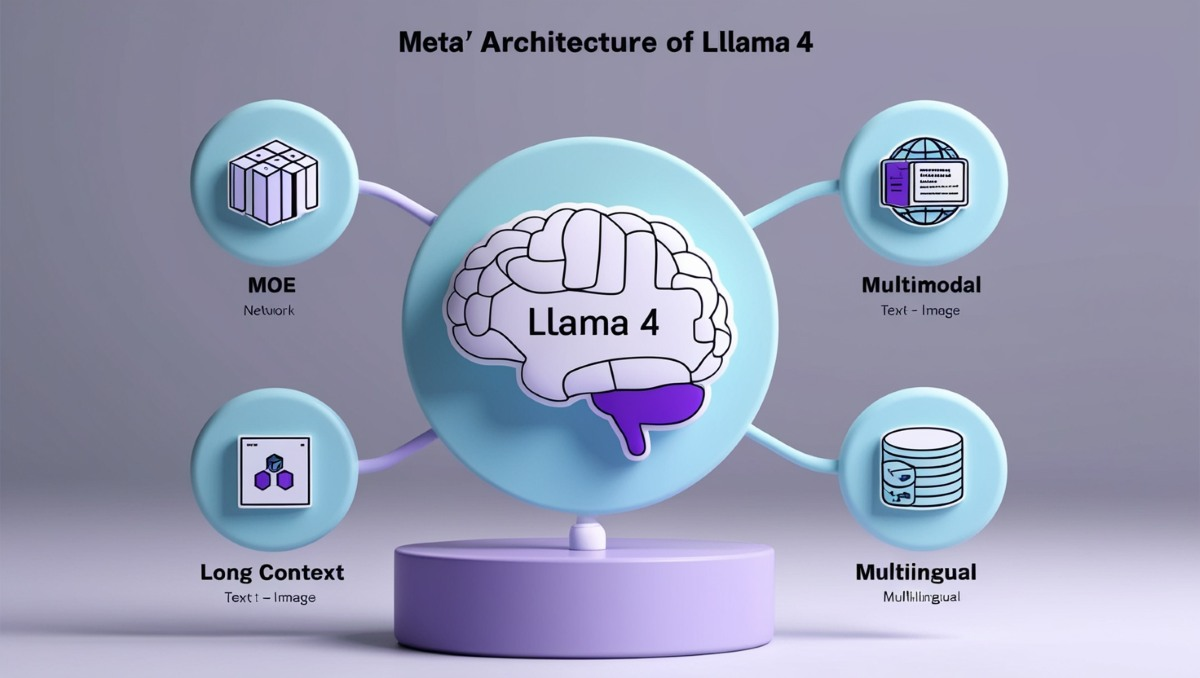
---
## 3. Core Properties

| Property | Description |
|----------|------------|
| Architecture | Transformer-based causal LM (decoder-only) |
| Tokenization | Byte-Pair Encoding (BPE) / SentencePiece |
| Context Length | Typically 4k–8k tokens for LLaMA 1–3; up to **10M tokens** for LLaMA 4 |
| Precision Support | FP32, FP16, BF16, INT8, INT4 (via quantization) |
| Device Support | CPU, single/multi-GPU, tensor parallelism |
| Training Objective | Next-token prediction (causal LM) |

---
## 4. Fine-Tuning Methods

- **Full Fine-Tuning**: Updates all model weights; expensive for large models  
- **Parameter-Efficient Fine-Tuning (PEFT)**:
  - **LoRA (Low-Rank Adaptation)**: Injects low-rank matrices in attention layers (~0.1–1% of parameters)
  - **Adapters / Prompt Tuning**: Lightweight layers or embeddings for task-specific adaptation  
- **Supervised Fine-Tuning (SFT)**: Uses task-specific labeled datasets  
- **Reinforcement Learning from Human Feedback (RLHF)**: Aligns outputs with human preferences  

⚡ PEFT + LoRA allows training massive models like **LLaMA-3-8B** or **LLaMA-4 Scout** on limited GPU resources.

---
## 5. Quantization

| Type | Notes |
|------|------|
| INT4 / NF4 | Ultra-efficient, slightly lower accuracy |
| INT8 | Good memory savings, minimal accuracy loss |
| FP16 / BF16 | Half-precision, balances speed and accuracy |

**Tools**: BitsAndBytes, Transformers `quantization_config`

---
## 6. Inference Properties

- Supports **text generation, summarization, instruction-following, reasoning**  
- Can use `device_map="auto"` to split large models across GPUs  
- Compatible with **Hugging Face pipeline API**  

---
## 7. Key Advantages

- High performance on **reasoning and instruction-following tasks**  
- Flexible fine-tuning via **PEFT techniques**  
- Memory-efficient deployment with **4-bit or 8-bit quantization**  
- Open research model: can be **extended and adapted** for custom tasks  
- **LLaMA 4** adds **mixture-of-experts, multimodal input, extended context, and multilingual support**

# ##Let's see some practicle to understand the Llama model clearly.

**Fine tuning using PEFT with LoRA**

* This script fine-tunes the "bigscience/mt0-large" model using PEFT (Parameter-Efficient Fine-Tuning) with LoRA.
* LoRA (Low-Rank Adaptation) reduces the number of trainable parameters by injecting low-rank matrices into
* transformer layers, making fine-tuning faster and memory-efficient.**
* Here, only ~0.19% of the model’s parameters (about 2.36M out of 1.23B) are trainable,
* while the rest are frozen, significantly lowering compute cost without much loss in performance.


In [ ]:
from transformers import AutoModelForSeq2SeqLM
from peft import get_peft_config, get_peft_model, LoraConfig, TaskType
model_name_or_path = "bigscience/mt0-large"
tokenizer_name_or_path = "bigscience/mt0-large"

peft_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM, inference_mode=False, r=8, lora_alpha=32, lora_dropout=0.1
)

model = AutoModelForSeq2SeqLM.from_pretrained(model_name_or_path)
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()
"trainable params: 2359296 || all params: 1231940608 || trainable%: 0.19151053100118282"

trainable params: 2,359,296 || all params: 1,231,940,608 || trainable%: 0.1915


'trainable params: 2359296 || all params: 1231940608 || trainable%: 0.19151053100118282'

* This script loads a LoRA fine-tuned causal language model ("ybelkada/opt-350m-lora") using PEFT.
* It pairs the model with the base "facebook/opt-350m" tokenizer and runs inference on a sample prompt.
* The code demonstrates how to load, run, and decode outputs from a LoRA-adapted model on GPU.


In [ ]:
from peft import AutoPeftModelForCausalLM
from transformers import AutoTokenizer
import torch

model = AutoPeftModelForCausalLM.from_pretrained("ybelkada/opt-350m-lora").to("cuda")
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-350m")

model.eval()
inputs = tokenizer("how is datascince jobs in future", return_tensors="pt")

outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=50)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True)[0])

"Preheat the oven to 350 degrees and place the cookie dough in the center of the oven. In a large bowl, combine the flour, baking powder, baking soda, salt, and cinnamon. In a separate bowl, combine the egg yolks, sugar, and vanilla."

adapter_config.json:   0%|          | 0.00/416 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/663M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/662M [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/6.30M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

how is datascince jobs in future?
I think it's a good thing. I'm not sure if it's a good thing or not, but it's a good thing.


'Preheat the oven to 350 degrees and place the cookie dough in the center of the oven. In a large bowl, combine the flour, baking powder, baking soda, salt, and cinnamon. In a separate bowl, combine the egg yolks, sugar, and vanilla.'

* This script fine-tunes the Llama-2-7B model using Hugging Face's TRL (Transformer Reinforcement Learning) library.  
* It performs supervised fine-tuning (SFT) on the "openassistant-guanaco" dataset with 4-bit quantization (for memory efficiency)
* and PEFT (Parameter-Efficient Fine-Tuning) via LoRA.  
* Training is configured with batch size 4, gradient accumulation for stability, and logging with Weights & Biases (wandb).  


In [ ]:
# pip install trl
!git clone https://github.com/huggingface/trl

!python trl/examples/scripts/sft.py \
    --model_name meta-llama/Llama-2-7b-hf \
    --dataset_name timdettmers/openassistant-guanaco \
    --load_in_4bit \
    --use_peft \
    --batch_size 4 \
    --gradient_accumulation_steps 2 \
    --log_with wandb

Cloning into 'trl'...
remote: Enumerating objects: 18868, done.
remote: Counting objects: 100% (1207/1207), done.
remote: Compressing objects: 100% (633/633), done.
remote: Total 18868 (delta 995), reused 574 (delta 574), pack-reused 17661 (from 5)
Receiving objects: 100% (18868/18868), 13.06 MiB | 28.88 MiB/s, done.
Resolving deltas: 100% (14016/14016), done.


* This script demonstrates how to apply and merge a LoRA adaptor fine-tuning
* (from "manojpatil/llama-2-7b-chat-lora-adaptor") on the base "Llama-2-7b-chat-hf" model.
* It loads the base model, applies LoRA weights, merges them into the main model,
* and runs inference before and after merging to compare outputs.


In [ ]:
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

# -------------------------------
# 1. Define model names and device
# -------------------------------
model_name = "meta-llama/Llama-2-7b-chat-hf"   # Base Llama-2 7B chat model
new_model = "manojpatil/llama-2-7b-chat-lora-adaptor"  # LoRA fine-tuned adaptor
device_map = {"": 0}  # Run on GPU 0

# -------------------------------
# 2. Load the base Llama-2 model
# -------------------------------
base_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map=device_map,
)

# -------------------------------
# 3. Load and merge the LoRA adaptor
# -------------------------------
model = PeftModel.from_pretrained(base_model, new_model)
model = model.merge_and_unload()  # Merge LoRA weights into the base model

# -------------------------------
# 4. Load and configure tokenizer
# -------------------------------
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token  # Avoid padding issues
tokenizer.padding_side = "right"

# -------------------------------
# 5. Define a test prompt
# -------------------------------
prompt = "Who draw the picture of Monalisa"

# -------------------------------
# 6. Run inference with base model
# -------------------------------
pipe = pipeline(task="text-generation", model=base_model, tokenizer=tokenizer, max_length=200)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

# -------------------------------
# 7. Run inference with LoRA merged model
# -------------------------------
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

In [ ]:
# !pip install --upgrade transformers
# !pip install huggingface_hub

from huggingface_hub import login
login()

* This script loads Meta’s Llama-3.1-8B model using Hugging Face Transformers
* and runs a text-generation pipeline on GPU/accelerator.
* It demonstrates how to set the model precision (bfloat16),
* automatically place layers on available devices, and generate a response for a sample prompt.

In [ ]:
import transformers
import torch

# -------------------------------
# 1. Define the model ID
# -------------------------------
# Here we are using Meta's Llama-3.1-8B model from Hugging Face Hub.
model_id = "meta-llama/Llama-3.1-8B"
# -------------------------------
# 2. Load a text-generation pipeline
# -------------------------------
# - "text-generation" tells Transformers we want causal LM generation.
# - model_kwargs sets the tensor precision to bfloat16 (saves memory vs float32).
# - device_map="auto" automatically spreads the model across available GPUs/accelerators.
pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto"
)
# -------------------------------
# 3. Run inference with a sample prompt
# -------------------------------
# The pipeline generates a text response based on the given input query.
pipeline("Hey how is the weather today in hyderabad india?")


In [ ]:
# This code need above 24 GB RAM

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from PIL import Image
import requests
from huggingface_hub import login # Import login function
from google.colab import userdata # Import userdata to access secrets

# Get your Hugging Face token from Colab Secrets Manager
# Save your token to Colab Secrets Manager under the name 'HF_TOKEN'
huggingface_token = userdata.get("HF_TOKEN")

if huggingface_token is None:
    print("Please add your Hugging Face token to Colab Secrets Manager with the name 'HF_TOKEN'")
else:
    login(token=huggingface_token) # Login to Hugging Face

    # Check if GPU is available
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load the tokenizer and model
    model_name = "meta-llama/Llama-3.2-11B-Vision"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

    # Prepare your input prompt for text generation
    text_prompt = "What do you see in this image?"

    # Load and preprocess an image
    image_url = "https://fileinfo.com/img/ss/xl/jpg_44-2.jpg"  # Replace with your image URL
    image = Image.open(requests.get(image_url, stream=True).raw)

    # Here, you would typically preprocess the image as required by the model
    # (specific preprocessing steps may depend on the model's requirements)

    # Generate a response
    inputs = tokenizer(text_prompt, return_tensors="pt").to(device)

    with torch.no_grad():
        output = model.generate(inputs['input_ids'], max_length=100)

    # Decode and print the output
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print("Generated Text:", generated_text)

In [1]:
import json
import torch
from transformers import (
    AutoTokenizer,           # For converting text to token IDs and vice versa
    AutoModelForCausalLM,    # For loading causal language models (LLMs)
    BitsAndBytesConfig,      # For 4-bit/8-bit quantization configuration (memory-efficient inference)
    pipeline)                 # High-level API for text-generation and other tasks

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import userdata

# Get your Hugging Face token from Colab Secrets Manager
# Save your token to Colab Secrets Manager under the name 'HF_TOKEN'
HF_TOKEN = userdata.get("HF_TOKEN")

if HF_TOKEN is None:
    print("Please add your Hugging Face token to Colab Secrets Manager with the name 'HF_TOKEN'")

* This code sets up a memory-efficient 4-bit quantization configuration using BitsAndBytes
* for the Meta-Llama-3-8B model. Quantization reduces GPU memory usage, allowing
* large models to run on limited hardware without significant loss in performance.


In [6]:
model_name = 'meta-llama/Meta-Llama-3-8B'

# Using BitsAndBytesConfig to reduce memory footprint while loading the model.
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,                  # Load the model in 4-bit precision
    bnb_4bit_use_double_quant=True,     # Use double quantization for better accuracy
    bnb_4bit_quant_type="nf4",          # Quantization type: NormalFloat4
    bnb_4bit_compute_dtype=torch.bfloat16  # Compute in bfloat16 for better speed/precision
)

In [7]:
# 1. Load the tokenizer
# AutoTokenizer automatically selects the correct tokenizer class for the model.
# HF_TOKEN is used to access private or gated Hugging Face models.
tokenizer = AutoTokenizer.from_pretrained(model_name, token=HF_TOKEN)

# 2. Set padding token
# Some LLaMA models do not have a dedicated pad token.
# Using eos_token as pad_token ensures proper batch padding without errors.
tokenizer.pad_token = tokenizer.eos_token

* This code loads the Meta-Llama-3-8B causal language model from Hugging Face Hub
* with 4-bit quantization (using BitsAndBytesConfig) for memory-efficient inference.
* The model is automatically placed on available GPU(s) using device_map="auto".


In [8]:
from transformers import AutoModelForCausalLM

# - AutoModelForCausalLM automatically selects the correct causal LM class.
# - HF_TOKEN is used to authenticate access to gated Hugging Face models.
# - quantization_config=bnb_config applies 4-bit quantization for memory efficiency.
# - device_map='auto' automatically distributes model layers across available GPUs.
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    token=HF_TOKEN,
    quantization_config=bnb_config,
    device_map='auto'
)

In [9]:
# - 'text-generation' specifies the task for causal language models.
# - model: the 4-bit quantized Meta-Llama-3-8B model loaded earlier.
# - tokenizer: the tokenizer corresponding to the model.
# - max_new_tokens: limits the length of generated text to 128 tokens.

text_generator = pipeline(
   'text-generation',
   model=model,
   tokenizer=tokenizer,
   max_new_tokens=128,
)

Device set to use cuda:0


* This function takes a text prompt as input, passes it through the
* Meta-Llama-3-8B text-generation pipeline, and returns the generated text.

In [10]:
def get_response(prompt):
    # Pass the prompt to the text-generation pipeline
    sequences = text_generator(prompt)

    # Extract the generated text from the pipeline output
    gen_text = sequences[0]['generated_text']

    # Return the generated text
    return gen_text

' what is generativa ai & llm mode 2: generative ai is the ability of an ai system to create new content, such as art or music, based on a set of rules and inputs. llm is a machine learning model that is trained on a dataset of examples and uses those examples to make predictions about new data. generative ai is a type of llm that is trained on a dataset of examples and uses those examples to make predictions about new data. generative ai is a type of llm that is trained on a dataset of examples and uses those examples to make predictions about new data. generative ai is a type of llm that is trained on a'

In [3]:
model_name = 'meta-llama/Meta-Llama-3.1-405B'

# QUANTIZATION CONFIGURATION

In [4]:
from transformers import BitsAndBytesConfig
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [8]:
!pip install -U bitsandbytes

# LOADING THE TOKENIZER AND LLM

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_name,token=HF_TOKEN)
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
from transformers import AutoConfig, AutoModelForCausalLM

config = AutoConfig.from_pretrained(
    model_name,
    rope_scaling={"type": "dynamic", "factor": 8.0},  # ✅ valid here
    trust_remote_code=True
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    config=config,
    device_map="auto",
    quantization_config=bnb_config,
    token=HF_TOKEN
)


In [ ]:
# This model also need more space.

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
    use_auth_token=HF_TOKEN,
    rope_scaling={"type": "dynamic", "factor": 8.0},
    trust_remote_code=True
)

text_generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=128
)


/usr/local/lib/python3.12/dist-packages/transformers/models/auto/auto_factory.py:492: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/89.5k [00:00<?, ?B/s]

Fetching 191 files:   0%|          | 0/191 [00:00<?, ?it/s]

model-00007-of-00191.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00004-of-00191.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00002-of-00191.safetensors:   0%|          | 0.00/4.03G [00:00<?, ?B/s]

model-00003-of-00191.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00006-of-00191.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00008-of-00191.safetensors:   0%|          | 0.00/3.49G [00:00<?, ?B/s]

model-00005-of-00191.safetensors:   0%|          | 0.00/3.49G [00:00<?, ?B/s]

model-00001-of-00191.safetensors:   0%|          | 0.00/4.81G [00:00<?, ?B/s]

model-00011-of-00191.safetensors:   0%|          | 0.00/3.49G [00:00<?, ?B/s]

model-00009-of-00191.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00010-of-00191.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00012-of-00191.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00013-of-00191.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00014-of-00191.safetensors:   0%|          | 0.00/3.49G [00:00<?, ?B/s]